## chapter  决策树  -- 李航

决策树可用于分类与回归问题，本章主要介绍分类树。他采用if-then的规则，用特征对实例进行递归分类，使得呈现树形结构。也可以理解为定义在特征空间与类空间上的条件概率分布，可读性好且分类速度快。通常包含：*特征选择、树生成与修剪*三步。



### 决策树模型与学习

树形结构组成：结点（内部与叶子）和有向边。

- 内部节点对应特征属性，根据定义的规则，从根节点不断生长对实例进行拆分，**满足互斥且完备**；
- 叶节点代表类别，也即规则的结论，通常采用平均法（回归）或多数投票法（分类）决定。

根据决策树的生成，可以看出他是对特征空间的划分，且互不相交；每个叶子节点即给定一条路径下的概率分布$P(Y|X=x_l)$,其中$x_l$只给定的路径$l$,决策树将该及结点实例归为概率大的哪一类。

- 属性视为坐标空间，则属性描述的样本即其中的数据点，分类即寻找合适的边界，且该边界与坐标轴分段平行。
- 在多变量决策时，非节点处对属性的线性组合构造分类器，如OC1，贪心寻找每个属性的最优权值，此时分类边界不在平行。

![](https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/4_14.png?raw=true)

故决策树学习是由训练数据集估计条件概率的模型，为使得有良好的泛化能力，采用损失函数作为优化目标，且通常为正则化的极大似然函数。所有可能中选择最优决策树是NP完全问题，一般采用启发式近似求解次最优解。

从根节点出发， 不断递归特征分割数据集，使得各个自己在一个当前条件下能够分类最好，当分类基本正确后，构建为叶子节点，否则继续分割直至所有数据子集基本分类正确。为防止过拟合，需要对树进行剪枝，即去掉过于细分的叶子节点。**树的生成对应模型的局部选择（局部最优），而剪枝则对应全局选择（全局最优）**

### 特征选择

选取具有分类能力的特征，如果分类结果与随机分类没有区别，则该特征不具有分类能力。分类能力评判：**信息增益或信息增益比**。

#### 信息增益

**信息熵**：样本集合D中不同类别的比例$p_k,k=1,\dots,|D|$, 则

$$H(D)=-\sum_{k=1}^{|D|} p_k\log_2p_k$$

越小纯度越高，最小值为0，[最大值为$\log_2|D|$](https://blog.csdn.net/feixi7358/article/details/83861858),即熵越大不确定性越大（在各分类等概率时）。

 > **证明**
 用$p_i$代替$p_i(x)$表示属于第i类变量的概率，其求和为1，故可使用拉格朗日乘子法： 
 $$H(p)=-\sum_{i=1}^n p_i \log p_i, \qquad \sum_{i=1}^n p_i=1$$
 $$H'(p) = -\sum_{i=1}^n p_i \log p_i + \lambda(\sum_{i=1}^n p_i-1)$$ 
 对其中$p_i$求偏导，有 $-\log p_i -1+\lambda=0$,带回$\sum_{i=1}^n p_i=1$,得
 $$p_i=e^{\lambda-1}, \qquad n e^{\lambda-1}=1, \qquad p_i=\frac{1}{n}$$
 在$H(p)$中，$0\leq p_i \leq 1$,故$p_i\log p_i \leq 0$，则$H(x) \geq 0$，并且当存在任意$p_i=1$时，等号成立。另外，显然对应上述证明最大值为$-\sum_{i=1}^n \frac{1}{n} \log \frac{1}{n}= \log n$

**条件熵 Conditional Entropy**，表示已知随机变量的X的条件下随机变量Y的不确定性。
\begin{aligned}
H(Y|X)&=\sum_{x\in X} p(x) H(Y|X=x) \\
      &= -\sum_{x\in X} p(x) \sum_{y\in Y} p(y|x)\log p(y|x) \\
      &= - \sum_{x\in X,y\in Y} p(x,y) \log p(y|x)
\end{aligned}

> **证明**:$H(X,Y)=H(X) + H(Y|X)= H(Y) + H(X|Y)$ 
\begin{aligned}
H(X) + H(Y|X) = & H(X) - \sum_{x\in X,y\in Y} p(y,x) \log p(y|x) \\
=& H(X) - \sum_{x\in X,y\in Y} p(y,x) (\log p(y,x) - \log p(x))\\
=& H(X) + H(X,Y) - H(X) = H(X,Y)
\end{aligned}

条件熵相当于联合熵减去给定的信息熵，即给定X后Y的不确定性，或者去掉X的不确定性剩下的Y的不确定性。联合熵也可以理解为描述X所需的信息加上给定X条件后Y所需的额外的信息。当熵和条件熵中的概率由数据估计（特别是极大似然估计）得到时，所对应的熵与条件熵分别称为经验熵（empirical entropy）和经验条件熵（empirical conditional entropy）。经验条件熵就是在某一条件约束下的经验熵。


在某属性a上，不同其不同取值来对数据D进行划分，记为$D^v$,然后根据节点所包含样本数不同而赋予不同权重$|D^v|/|D|$,即样本数越多的分支节点的影响越大，则可以算出属性a对样本D进行划分所获的**信息增益**，*一般的，熵H(Y)与条件熵H(Y|X)之差称为互信息*。

$$Gain(D,a)=H(D) - H(D|a)=H(D)-\sum_{v=1}^V\frac{|D^v|}{|D|} H(D^v)$$


#### 信息增益比

信息增益值的大小是相对训练数据集而言的，没有绝对意义；在分类问题的经验熵较大的时候，信息增益值也会偏大，故采用信息增益比可以进行校正：

$$g_R(D,a)=\frac{g(D,a)}{H(D)}$$



### 决策树的生成

**ID3**：选择信息增益最大来选择属性，*信息增益越大，则意味着属性a划分所得的纯度提升越大。* 相当于用了极大似然估计法进行概率模型的选择。

**CD4.5**：信息增益对可取值数目较多的属性有偏好，可以选择**信息增益率**进行属性选择

- 连续值处理，**连续属性离散化**，如C4.5二分类，
  - 连续值n个选择，从小到大排序，则有n-1个划分，选择划分使得信息增益最大。

- 缺失值处理
   - 缺失比例作为信息增益的权重，得到信息增益的推广

### 决策树的剪枝 pruning

为防止过拟合，也即训练样本太好树的分支太多的情况，可以主动去掉一些分支。

- 预剪枝，prepruning，每次对划分前后的泛化性能进行估计--测试集，降低过拟合的风险同时减少时间开销。但是可能会导致欠拟合。

![](https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/4_6.png?raw=true)

- 后剪枝，postpruning

![](https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/4_7.png?raw=true)


![](https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/pruning.png?raw=true)


### CART算法

### 例子

In [103]:
import pandas as pd
import numpy as np
watemelon = pd.read_csv('watermelon_3a.csv')
watemelon

,Idx,color,root,knocks,texture,navel,touch,density,sugar_ratio,label
0,1,dark_green,curl_up,little_heavily,distinct,sinking,hard_smooth,0.697,0.460,1
1,2,black,curl_up,heavily,distinct,sinking,hard_smooth,0.774,0.376,1
2,3,black,curl_up,little_heavily,distinct,sinking,hard_smooth,0.634,0.264,1
3,4,dark_green,curl_up,heavily,distinct,sinking,hard_smooth,0.608,0.318,1
4,5,light_white,curl_up,little_heavily,distinct,sinking,hard_smooth,0.556,0.215,1
5,6,dark_green,little_curl_up,little_heavily,distinct,little_sinking,soft_stick,0.403,0.237,1
6,7,black,little_curl_up,little_heavily,little_blur,little_sinking,soft_stick,0.481,0.149,1
7,8,black,little_curl_up,little_heavily,distinct,little_sinking,hard_smooth,0.437,0.211,1
8,9,black,little_curl_up,heavily,little_blur,little_sinking,hard_smooth,0.666,0.091,0
9,10,dark_green,stiff,clear,distinct,even,soft_stick,0.243,0.267,0


In [104]:
def Ent(Y): # should be array
    n = len(Y)
    uniq_y = np.unique(Y)
    ent = 0.0
    for i in uniq_y: # 可以保证 pi>0
        yi=np.where(Y==i)
        pi=np.shape(yi)[1]/n
        ent -= pi * np.math.log(pi, 2)
    return ent

def CondEnt(X, Y): # give condition variable column for discrete 
    n = len(Y)
    X_uiq = np.unique(X) 
    condent = 0.0
    for i in X_uiq:
        idx = np.where(X==i)
        xi = X[idx]
        yi = Y[idx]
        pxi = len(idx[0])/n
        hyx = Ent(yi)
        condent += pxi * hyx      
    return condent

def EntGain(X, Y):
    ent = Ent(Y)
    condent = CondEnt(X, Y)
    if condent==0: # continous variable split to 2 class
        tcondent = []
        for i in X:
            tX = np.arange(len(X))
            tX[X<i] = 0
            tX[X>=i]= 1
            tcondent.append(CondEnt(tX, Y))
        condent = min(tcondent)
    gain = ent - condent
    return gain

In [105]:
Y = np.array(watemelon.iloc[:,-1])
print(Ent(Y))
X0 = np.array(watemelon.iloc[:,0])
print(CondEnt(X0, Y))
X1 = np.array(watemelon.iloc[:,1])
print(CondEnt(X1, Y))

0.9975025463691153
0.0
0.88937738110375


In [106]:
print(EntGain(X0, Y))
print(EntGain(X1, Y))

0.9975025463691153
0.10812516526536531


In [107]:
CondEntropy = []
n,m = watemelon.shape
for i in range(m-1):
    Xi = np.array(watemelon.iloc[:,i])
    CondEntropy.append(CondEnt(Xi, Y))
CondEntropy    

[0.0,
 0.88937738110375,
 0.8548275868023224,
 0.8567211127541194,
 0.6169106490008467,
 0.7083437635274363,
 0.9914560571925497,
 0.0,
 0.0]

In [108]:
EntroyGain = []
for i in range(m-2):
    Xi = np.array(watemelon.iloc[:,i+1])
    EntroyGain.append(EntGain(Xi, Y))
EntroyGain    

[0.10812516526536531,
 0.14267495956679288,
 0.14078143361499584,
 0.3805918973682686,
 0.28915878284167895,
 0.006046489176565584,
 0.2624392604045631,
 0.34929372233065203]

([<matplotlib.axis.XTick at 0x113a79be0>,
 <a list of 8 Text xticklabel objects>)

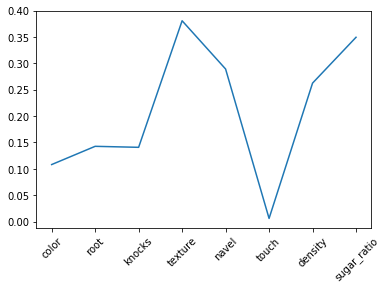

In [109]:
import matplotlib.pyplot as plt  
plt.plot(EntroyGain)
group_labels = watemelon.columns.values[1:9]
plt.xticks(range(8), group_labels, rotation=45) 